### un espcace vectoriel:
On appelle espace vectoriel E sur un corps commutatif K un ensemble d’éléments (vecteurs) qui vérifient les propriétés suivantes:


- E est muni d’une structure de groupe commutatif pour une loi de composition interne, l’addition vectorielle, notée (+).
- qulque soit a, b appartient a K, et pour tout U,V appartients a E on a: a*(U+V)=a*U + a*V. et a*(b*U)=(a*b)*U.

### Espace vectoriel Euclidien:

Un espace vectoriel E est dit euclidien s’il est muni d’un produit scalaire f qui à U,V appartient a E. fait correspondre le nombre réel tel que:


- f(U,V) = f(V,U)
- fU,a*V) = a*f(U,V)
- f(U,V+W) = f(U,V) + f(U,W)
- f(U,U) >= 0, (Egalite si U = 0)
- Notaton: f(U,V) = U.V


In [4]:
from symtable import Class

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


class Vector:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

    def __add__(self, other):
        return Vector(self.x + other.x, self.y + other.y, self.z + other.z)

    def __sub__(self, other):
        return Vector(self.x - other.x, self.y - other.y, self.z - other.z)

    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar, self.z * scalar)

    def dot(self, others):
        return self.x * others.x + self.y * others.y + self.z * others.z

    def norm(self):
        return np.sqrt(self.x**2 + self.y**2 + self.z**2)

    def angle_width(self, other):
        dot_product = self.dot(other)
        norm_product = self.norm()

        if norm_product == 0:
            return 0
        cos_theta = dot_product / norm_product
        return np.degrees(np.arccos(np.clip(cos_theta, -1, 1))) ## be sure that you use np.clip() function to avoid errors when u call the arcos() function

    def to_array(self):
        return np.array([self.x, self.y, self.z])

    def __repr__(self):
        return f"Vector = [{self.x}, {self.y}, {self.z}]"

On trace les trois vecteurs sur un espace 3D..

Vector = [0, 1, 1] Vector = [0, 1, 0]
U + v = Vector = [0, 2, 1]
Produit scalaire: U x V = 1
La norme U et V est: 1.4142135623730951, 1.0 (succussive
Anfgle entre U et V: 45.00°


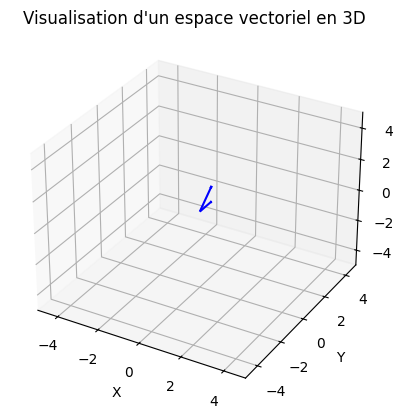

In [16]:

if __name__ == "__main__":

    U = Vector(0,1,1)
    V = Vector(0,1,0)

    sum = U + V
    dot_product = U.dot(V)
    norm_U = U.norm()
    norm_V = V.norm()
    angle = U.angle_width(V)

    print(U, V)
    print(f"U + v = {sum}")
    print(f"Produit scalaire: U x V = {dot_product}")
    print(f"La norme U et V est: {norm_U}, {norm_V} (succussive")
    print(f"Anfgle entre U et V: {angle:.2f}°")

    def plot(vector, colors=None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")

        origin = np.array([0,0,0])

        for i, v in enumerate(vector):
            color = colors[i] if colors else 'b'
            ax.quiver(origin[0], origin[1], origin[2],
                      v.x, v.y, v.z, color=color, arrow_length_ratio=0.1)


        ax.set_xlim([-5,5])
        ax.set_ylim([-5,5])
        ax.set_zlim([-5,5])
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.title("Visualisation d'un espace vectoriel en 3D")
        plt.show()

    vectors = [Vector(0,1,0), Vector(0,1,1)] # [Vector(2,1,3), Vector(-4, 2, -1), Vector(-1, 3, 3)]
    plot(vectors)

### Espace affine at espace metrique:

Dans la mecanique du solide, on distingue les deux espaces, deux concepts fondamentaux pour decrire la position et les mouvemmebt d'objets.

Espace affine est une structeur mathématique généraliser l'espace vectoriel, permettant du manipuler des point sans avoir d'origine privilège. Definer par un ensemble des points, un espace vectoriel assoccie. On peut parler de translation entre deux points A et B, notée AB (vecteur), on ne peut pas additionner directement les vecteur (Deux points), mais en peut calculer le vecteur entre eux. Aussi est le cadre naturel pour decrire les positions et les transformation geometrique.

Si A, B et C appartient a E (avec E est l'espace affine. (l'ensemble des points/elements)), et soit AB vecteur d'un espace vectroeiel E, On a:

    - AB = -AB
    - AC = AB + BC
    - quelque soit O dans E, et u (vecteur) dans E, il exist elements unique A dans E tq: OA = u (O et A sont des point et u vecteur)

    Un espace affine peut etre reresente en combinant un point d'origine avec un espace vectoriel associe.
    Un transformation affine est une application lineare suivie d'une translation. permet du tranformer des points dans l'espace.
    cette transformaton conservent les points, les droits, les plans, ainsi que la relation du parallelisme (.... correspending angles .... Alternate interior angles .... Verticale angles .... Alternate exterior angles ....)
    Enclue des operations tells que la translation, la rotation, la mise a l'echelle et la reflition

In [23]:
import numpy as np

angle = np.deg2rad(45)
cos_angle, sin_angle = np.cos(angle), np.sin(angle)

translations = np.array([[1,0,2], [0,1,3], [0,0,1]])
rotation = np.array([[cos_angle, -sin_angle, 0],
                     [sin_angle, cos_angle, 0],
                     [0,0,1]])

affine_matrix = np.dot(translations, rotation)
point = np.array([1,1,1])
transform_point = np.dot(affine_matrix, point)
print(transform_point)


[2.         4.41421356 1.        ]


Dans cette exemple, definie matrice du rotation et une matrice du translation, et en combine les deux pour obtunir une matrice du transformation affine complete, et l'application de cette matrice avec une point donne.

In [25]:
from  affine import Affine

transformation = Affine.rotation(45) * Affine.translation(2,3)
x,y = 1,1
x_prim, y_prim = transformation * (x,y)
print(f"novelle coordonnees: {x_prim}, {y_prim}")

novelle coordonnees: -0.7071067811865477, 4.949747468305833


Les differents type des transformation:
https://upload.wikimedia.org/wikipedia/commons/2/2c/2D_affine_transformation_matrix.svg


### Espace metrique

Est un espace affine muni d'une distance permettant du mesurer les lonueurs et les angles. Caracterise par un norme associee aux vecteurs, definie par un produit scalaire. La possibilite de calculer des distances entre les points (haha normaaaal).


Lorsqu'on analyse les deformations ou les distances entre points dans un solide, on utilise un espace metrique pour mesurer ces grandeurs. L’espace métrique associé à un espace vectoriel euclidien E de dimension 3.

### Vecteurs-Moment d'un vecteur;

En mécanique, le moment d'un vecteur est une notion essentielle pour comprendre les effets de rotation qu'une force ou un vecteur peut exercer par rapport à un point ou un axe donné.

Mais dabord, Je pense que essentielle avons le vecteur moment du comprende le vecteur lie et vecteur glissant.. -(W elaaaaaaaaaaaaaaaach????)- ..Vecteur lie et vecteur glissant modeliser les forces  et les mouvemnts des solides.


les deux vecteurs def par une direction (L'orientation du vecteur dans l'espace), une sens (Vers quelle direction pointe le vecteur le long de sa ligne d'action), une norme (La longueur ou l'intensite du vecteur), et comme le vecteur lie c'est un pointeur alors est defini par un point d'application (le point precis ou le vecteur est applique), par rapport a vecteur glissant caracterise par un droite support (La ligne le long de laquelle le vecteur peut glisser).

In [ ]:
import numpy as np

class VectorLie:
    def __init__(self, point_application, direction):
        self.point_application = np.array(point_application)
        self.direction = np.array(direction)

    def  __repr__(self):
        return f"Vecteur lie: ({self.point_application}.\nDirection: {self.direction})"

class VectorGlissant:
    def __init__(self, droit_support, direction ):
        self.droit_support = droit_support
        self.direction = np.array(direction)

# Vecteur lié avec un point d'application en (1, 2, 3) et une direction (4, 5, 6)
v_lie = VectorLie(point_application=(1, 2, 3), direction=(4, 5, 6))
print(v_lie)

# droite_upport = {"point": (0, 0, 0), "vecteur_directeur": (1, 0, 0)}
#"v_glissant = VectorGlissant(droite_support=droite_upport, direction=(7, 8, 9))
#print(v_glissant)


Vecteur lie: ([1 2 3].
Direction: [4 5 6])
